<a href="https://colab.research.google.com/github/juliansma/NLP/blob/main/2_Regresi%C3%B3n_consumo_de_gasolina%2C_usando_subclassing_en_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresión consumo de gasolina, usando subclassing en Keras

---



Julián Santiago Martínez

In [ ]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

In [ ]:
print(tf . __version__)

2.8.0


In [ ]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

40960/30286 [========================================] - 0s 0us/step


'/root/.keras/datasets/auto-mpg.data'

In [ ]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names = column_names, na_values = "?", comment ='\t', sep = " ", skipinitialspace = True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


### PREPROCESAMIENTO

Quitar datos faltantes

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset = dataset.dropna()

Codificación one - hot

In [ ]:
origin = dataset.pop('Origin')

In [ ]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0

dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


**Ejercicio**: codificación one-hot utilizando keras

In [ ]:
country = keras.utils.to_categorical(origin)
country = country[:,country.any(0)]
country[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
dataset_2 = dataset.copy()
dataset_2['USA1'] = country[:,0]*1.0
dataset_2['Europe1'] = country[:,1]*1.0
dataset_2['Japan1'] = country[:,2]
dataset_2.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan,USA1,Europe1,Japan1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0,1.0,0.0,0.0


**Dividir en entrenamiento y test**

In [ ]:
train_dataset = dataset.sample(frac= 0.8, random_state = 1)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_dataset.keys()

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'USA', 'Europe', 'Japan'],
      dtype='object')

**Análisis Descriptivo**

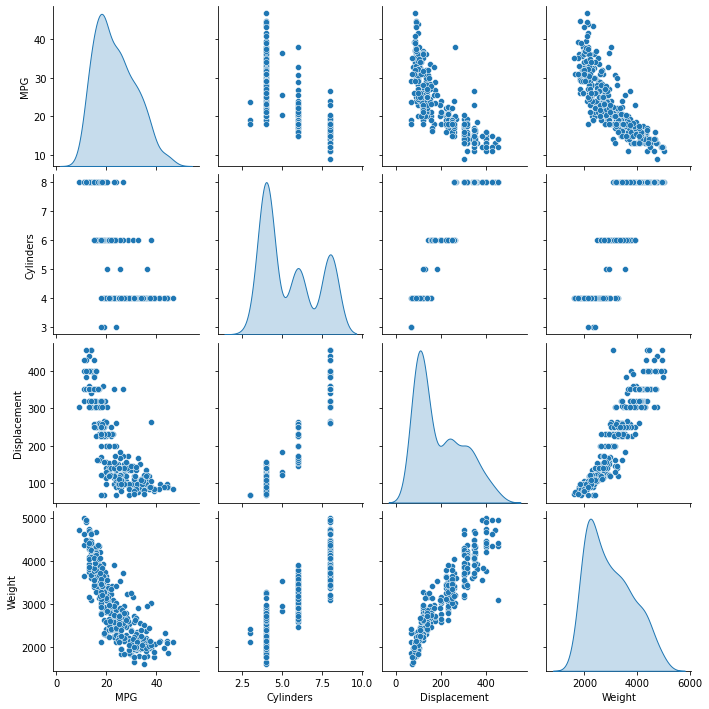

In [ ]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind = "kde")

In [ ]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.532166,7.951761,9.0,17.50,22.2,29.00,46.6
Cylinders,314.0,5.490446,1.703662,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.472930,105.269835,68.0,105.00,151.0,265.75,455.0
Horsepower,314.0,104.108280,38.153395,46.0,75.25,95.0,125.00,225.0
Weight,314.0,2972.388535,844.377092,1613.0,2223.75,2818.5,3608.00,4997.0
Acceleration,314.0,15.509236,2.797765,8.0,13.50,15.5,17.00,24.6
Model Year,314.0,76.012739,3.678775,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.630573,0.483420,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.191083,0.393782,0.0,0.00,0.0,0.00,1.0


Separar características y labels

In [ ]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')
train_labels

82     23.0
167    29.0
356    32.4
120    19.0
385    38.0
       ... 
185    26.0
153    18.0
382    34.0
304    37.3
192    22.0
Name: MPG, Length: 314, dtype: float64

Normalizar datos

In [ ]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_data.tail()

,Acceleration,Cylinders,Displacement,Europe,Horsepower,Japan,MPG,Model Year,USA,Weight
185,0.783041,-0.874848,-0.925934,-0.465148,-0.658088,-0.485251,NaN,-0.003463,0.764194,-0.849607
153,0.175413,0.299093,0.517974,-0.465148,0.023372,-0.485251,NaN,-0.275292,0.764194,0.576296
382,0.497098,-0.874848,-0.830940,-0.465148,-0.893978,2.054228,NaN,1.627515,-1.304400,-0.861450
304,-0.289244,-0.874848,-0.992430,2.143005,-0.920188,-0.485251,NaN,0.812026,-1.304400,-0.997645
192,-0.360729,0.299093,0.517974,-0.465148,0.023372,-0.485251,NaN,-0.003463,0.764194,0.450760


### CREAR MODELO

In [ ]:
train_dataset.shape

(314, 9)

In [ ]:
model = keras.Sequential([
layers.Dense(64, activation = 'relu', input_shape=(normed_train_data.shape[1],)),
layers.Dense(64, activation = 'relu'),
layers.Dense(1)
])

COMPILAR

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse',
                optimizer = optimizer,
                metrics = ['mae', 'mse'])

SUMMARY

In [ ]:
pip install pydot

In [ ]:
pip install graphviz

In [ ]:
model.summary()
#plot_model(model, to_file='../Imagenes/gasolina_model.png',
#         show_shapes= True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


ENTRENAR

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
    
        
epochs = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=epochs, validation_split = 0.2, verbose=1, 
  callbacks=[PrintDot()])

Epoch 1/1000
8/8 [==============================] - 1s 32ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 2/1000
8/8 [==============================] - 0s 5ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 5/1000
8/8 [==============================] - 0s 12ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,NaN,2
3,NaN,NaN,NaN,NaN,NaN,NaN,3
4,NaN,NaN,NaN,NaN,NaN,NaN,4


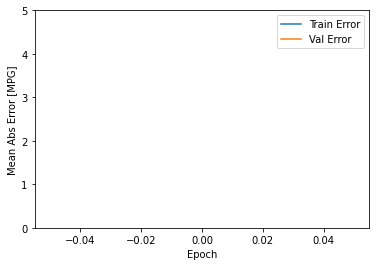

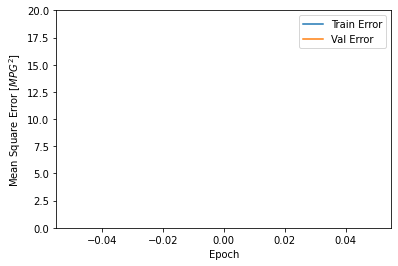

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'], label = 'Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'], label = 'Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()
    
plot_history(history)

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=10) # patience = # epochs para checkear la mejora

history = model.fit(normed_train_data, train_labels, epochs = epochs, 
                   validation_split = 0.2, verbose = 0, callbacks = [early_stop, PrintDot()])

plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose = 2)

print("Error medio absoluto del testing set: {:5.2f} MPG".format(mae))

### PREDICCIONES

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100,100],[-100,100] )

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("count")